This code solves the problem of disease prediction based on the input symptoms provided by the user. By leveraging a trained machine learning model, it takes a set of symptoms (like itching, skin rash, shivering, etc.) and predicts the most likely disease that matches those symptoms. The model is pre-trained using a dataset of various diseases (41) and their corresponding symptoms (132), enabling it to classify new symptom inputs into specific disease categories. This solution can be used to assist healthcare professionals or users in identifying potential diseases based on symptom descriptions.

In [88]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [89]:
import os
print(os.getcwd())

c:\Users\Mariya\team6-project\jupiter_notebooks


In [90]:
#Loading data from local folder
df_train_set = pd.read_csv("Training.csv")
df_test_set = pd.read_csv("Testing.csv")

In [91]:
df_train_set.info()
df_train_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [92]:
df_test_set.info()
df_test_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [93]:
#I want to find if any of the columns have no symptoms and everything is zero. 

column_sum_train = df_train_set.sum()
any_zero_column_train_sum = (df_train_set.sum() == 0).any()
columns_with_zero_sum_train = column_sum_train[column_sum_train == 0].index.tolist()
any_zero_sum_train = len(columns_with_zero_sum_train) > 0

print("Any column sum is zero:", any_zero_sum_train)
print("Columns with sum zero:", columns_with_zero_sum_train)

print()
print()
column_sum_test = df_test_set.sum()
any_zero_column_test_sum = (df_test_set.sum() == 0).any()
columns_with_zero_sum_test = column_sum_test[column_sum_test == 0].index.tolist()
any_zero_sum_test = len(columns_with_zero_sum_test) > 0

print("Any column sum is zero:", any_zero_sum_test)
print("Columns with sum zero:", columns_with_zero_sum_test)


Any column sum is zero: True
Columns with sum zero: ['fluid_overload', 'Unnamed: 133']


Any column sum is zero: True
Columns with sum zero: ['fluid_overload']


'Unnamed: 133' is an extra column in the training dataset

In [94]:
#Based on information above Unnamed 133 is an extra column in the test dataset whcih we want to remove. 
# Note column 'fluid_overload' has all symptoms = 0, so this can be potentially another column to drop later

df_train_set = df_train_set.drop(['Unnamed: 133'], axis=1)

column_sum_train = df_train_set.sum()
any_zero_column_train_sum = (df_train_set.sum() == 0).any()
columns_with_zero_sum_train = column_sum_train[column_sum_train == 0].index.tolist()
any_zero_sum_train = len(columns_with_zero_sum_train) > 0

print("Any column sum is zero:", any_zero_sum_train)
print("Columns with sum zero:", columns_with_zero_sum_train)

print()
print()
column_sum_test = df_test_set.sum()
any_zero_column_test_sum = (df_test_set.sum() == 0).any()
columns_with_zero_sum_test = column_sum_test[column_sum_test == 0].index.tolist()
any_zero_sum_test = len(columns_with_zero_sum_test) > 0

print("Any column sum is zero:", any_zero_sum_test)
print("Columns with sum zero:", columns_with_zero_sum_test)


Any column sum is zero: True
Columns with sum zero: ['fluid_overload']


Any column sum is zero: True
Columns with sum zero: ['fluid_overload']


In [95]:
df_train_set.head()
df_train_set.info()
df_train_set.shape
print()

df_test_set.head()
df_test_set.info()
df_test_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


(42, 133)

In [96]:
#checking the rest of the set for missing values
df_train_set.isna().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [97]:
#checking the rest of the set for missing values
df_test_set.isna().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [98]:
X_train = df_train_set.drop(columns=['prognosis'])
y_train = df_train_set['prognosis']

X_test = df_test_set.drop(columns=['prognosis'])
y_test = df_test_set['prognosis']

In [99]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [100]:
#Checking how many unique diseases/prognoses we have
num_diseases = len(df_train_set['prognosis'].unique())
num_diseases

41

In [101]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()

# Fit and transform the prognosis labels into integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=41)  # 41 is the number of unique diseases
y_test = to_categorical(y_test, num_classes=41)



In [102]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # input layer + first hidden layer
model.add(Dense(64, activation='relu'))  # second hidden layer
model.add(Dense(41, activation='softmax'))  # output layer (41 classes = disease)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               17024     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 41)                2665      
                                                                 
Total params: 27,945
Trainable params: 27,945
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
154/154 [==============================] - 1s 3ms/step - loss: 3.7075 - accuracy: 0.0541 - val_loss: 3.6935 - val_accuracy: 0.0714
Epoch 2/20
154/154 [==============================] - 0s 2ms/step - loss: 3.6394 - accuracy: 0.1232 - val_loss: 3.5267 - val_accuracy: 0.1429
Epoch 3/20
154/154 [==============================] - 0s 2ms/step - loss: 3.2613 - accuracy: 0.2199 - val_loss: 2.9295 - val_accuracy: 0.2143
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 2.6489 - accuracy: 0.4409 - val_loss: 2.3399 - val_accuracy: 0.5714
Epoch 5/20
154/154 [==============================] - 0s 2ms/step - loss: 2.1221 - accuracy: 0.6205 - val_loss: 1.8727 - val_accuracy: 0.6905
Epoch 6/20
154/154 [==============================] - 0s 2ms/step - loss: 1.7010 - accuracy: 0.7868 - val_loss: 1.4834 - val_accuracy: 0.8095
Epoch 7/20
154/154 [==============================] - 0s 2ms/step - loss: 1.3605 - accuracy: 0.8451 - val_loss: 1.1758 - val_accuracy: 0.9286
Epoch 

In [104]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 [==============================] - 0s 5ms/step - loss: 0.0744 - accuracy: 1.0000
Test Loss: 0.07439472526311874
Test Accuracy: 1.0


In [105]:
# Predict on new data (example)
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the integer labels back to the original disease names
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Example: Print first 5 predictions
print(predicted_labels[:5])

2/2 [==============================] - 0s 3ms/step
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction']


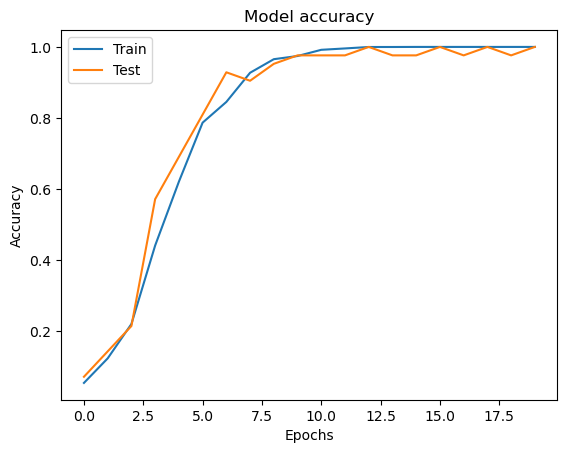

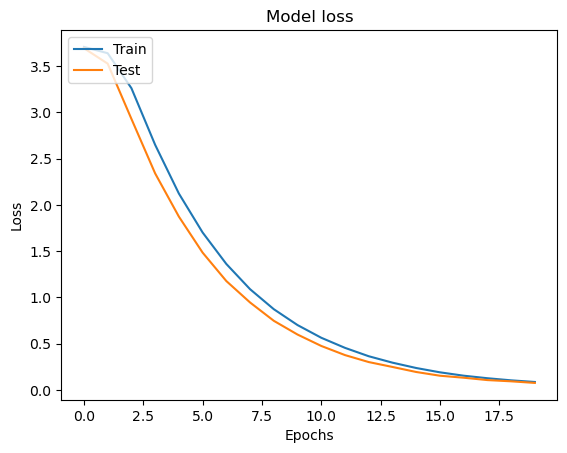

In [106]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()